In [21]:
import pandas as pd

# 获取数据 csv 数据
data = pd.read_csv('data/zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [22]:
# 获取列名为 close 的数据，也就是收盘价
price = data.loc[:, 'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

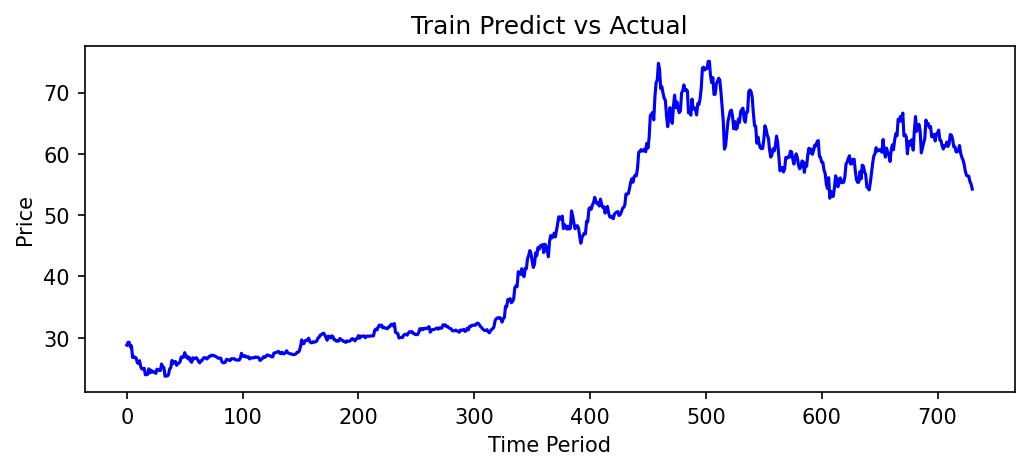

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# 绘图
fig1 = plt.figure(figsize=(8, 3), dpi=150, facecolor='white')
plt.plot(price, color='blue')
plt.title('Train Predict vs Actual')  # 标题
plt.xlabel('Time Period')  # x轴标题
plt.ylabel('Price')  # y轴标题
plt.show()

In [24]:
#  数据归一化，将数据按比例缩放，使之落入一个小的特定区间 [0, 1] 之间
# price_norm = price / max(price)
price_norm = price / price.max()
# 简单的归一化方法：最小-最大归一化（Min-Max Normalization）。
# 将每个数据点除以数据集中的最大值。

print(price_norm)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


归一化后的数据有助于提高神经网络训练过程中的数值稳定性，因为所有的输入特征都在相同的数值范围内。这有助于避免某些特征在计算过程中对其他特征产生数值上的压制，从而使得网络权重的更新更加平衡，加速模型的收敛速度。

归一化可以防止数值问题，如梯度消失或梯度爆炸，这些问题都可能在训练过程中出现，尤其是在RNN这类深度学习模型中。通过归一化，可以确保梯度在反向传播过程中保持稳定，从而提高训练效率。

归一化后的数据有助于提高模型的泛化能力。因为所有的特征都在相同的尺度上，模型可以更好地学习特征之间的关系，而不是被某些尺度较大的特征所主导。这有助于模型在面对新的、未见过的数据时，依然能够做出准确的预测。

在进行矩阵运算时，如果数据的数值过大，可能会导致数值溢出，影响计算结果的准确性。通过归一化，可以确保数据的数值在一个安全的范围内，避免这类问题的发生。

在初始化模型参数时，通常会选择一些较小的数值以避免对训练过程产生不利影响。如果输入数据未经归一化，可能需要对参数初始化进行额外的调整，以适应不同尺度的输入数据。

归一化有助于确保模型中各个特征的独立性，使得模型能够更好地识别和学习每个特征对预测结果的独立贡献。这对于提高模型的解释性和可理解性是非常有帮助的。

In [25]:
import numpy as np


# 数据特征提取，x, y
def extract_data(data, time_step):
    """
    :param data 原始的时间序列数据，通常是一个包含数值的列表或数组
    :param time_step 预测未来值的过去观测值的数量
    """
    x = []  # 存储特征
    y = []  # 标签
    for i in range(len(data) - time_step):
        x.append([a for a in data[i:i + time_step]])
        y.append(data[i + time_step])  # 目标值

    # 转换为 NumPy 数组，大多数机器学习模型期望输入数据是 NumPy 数组格式
    x = np.array(x)
    y = np.array(y)

    # 将 x 数组重塑为三维数组，满足神经网络架构的输入要求
    x = x.reshape(x.shape[0], x.shape[1], 1)
    return x, y


# 模型参数
time_step = 8  # 使用过去 8 个时间步长的数据来预测下一个值
x, y = extract_data(price_norm, time_step)  # 处理特征

print(x, "\n", x.shape)
print(y, "\n", y.shape)

[[[0.38327341]
  [0.38926621]
  [0.38966573]
  ...
  [0.35637235]
  [0.35876948]
  [0.35583966]]

 [[0.38926621]
  [0.38966573]
  [0.37954455]
  ...
  [0.35876948]
  [0.35583966]
  [0.35583966]]

 [[0.38966573]
  [0.37954455]
  [0.3818085 ]
  ...
  [0.35583966]
  [0.35583966]
  [0.34531895]]

 ...

 [[0.80023971]
  [0.79131709]
  [0.7857238 ]
  ...
  [0.75229724]
  [0.75109868]
  [0.75056599]]

 [[0.79131709]
  [0.7857238 ]
  [0.77600213]
  ...
  [0.75109868]
  [0.75056599]
  [0.7384472 ]]

 [[0.7857238 ]
  [0.77600213]
  [0.7610867 ]
  ...
  [0.75056599]
  [0.7384472 ]
  [0.73312026]]] 
 (723, 8, 1)
[0.35583966 0.34531895 0.34358769 0.34944733 0.33639632 0.33133573
 0.33226795 0.33280064 0.31908377 0.31895059 0.32001598 0.33173525
 0.32307897 0.32893861 0.32454388 0.3254761  0.32481023 0.32174724
 0.33093621 0.32987082 0.32813957 0.32827274 0.34225596 0.3359968
 0.33479824 0.31548808 0.31735251 0.31615395 0.31948329 0.33173525
 0.33439872 0.34998002 0.34332135 0.34665069 0.34771607 0.

In [26]:
from keras import Input
from keras.models import Sequential  #导入 Keras 中用于线性堆叠层的模型类
from keras.layers import Dense, RNN, SimpleRNN, LSTM

# 创建了一个Sequential模型实例，并将其赋值给变量model。实例是空的，没有添加任何层，但提供了一个框架，可以在此基础上构建神经网络模型
model = Sequential()

# 定义输入层
# shape 参数定义了输入数据的维度
# time_step 是时间步长，表示每个输入样本将包含 time_step 个时间点的数据，每个时间点的数据是一个特征（因此是1）
model.add(Input(shape=(time_step, 1)))

# 添加 RNN 层，使用的是 LSTM
# units 参数指定了 RNN 层中的单元（神经元）数量，这里是5个
# activation 参数定义了激活函数，这里是 ReLU（修正线性单元）
model.add(SimpleRNN(units=5, activation='relu'))

# 添加全连接的输出层
# units 参数设置为 1，表示输出层只有一个神经元
# activation 参数设置为 linear，不使用激活函数
model.add(Dense(units=1, activation='linear'))

# 编译
# 指定优化器为 adam，这是一种常用的随机梯度下降优化器
# 损失函数设置为 mean_squared_error，回归问题常用的损失函数，用于计算预测值和实际值之间的均方误差
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 训练模型
# epochs 是训练的轮数
# batch_size 是每次梯度下降中使用的数据样本数量，这里是 30。
model.fit(x, y, epochs=200, batch_size=30)

# 进行预测
# 使用训练好的模型对训练集 x 进行预测，并将预测结果乘以 price 列表中的最大值，将预测结果缩放到与原始数据相同的尺度
y_train_predict = model.predict(x) * max(price)

# 将实际的标签 y 中的每个值乘以 price 列表中的最大值，这同样是为了将标签值缩放到与原始数据相同的尺度
y_train = [i * max(price) for i in y]

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4672
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3143 
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1239 
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157 
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 
Epoch 13/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 
Epoch 14/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 
Epoch 15/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

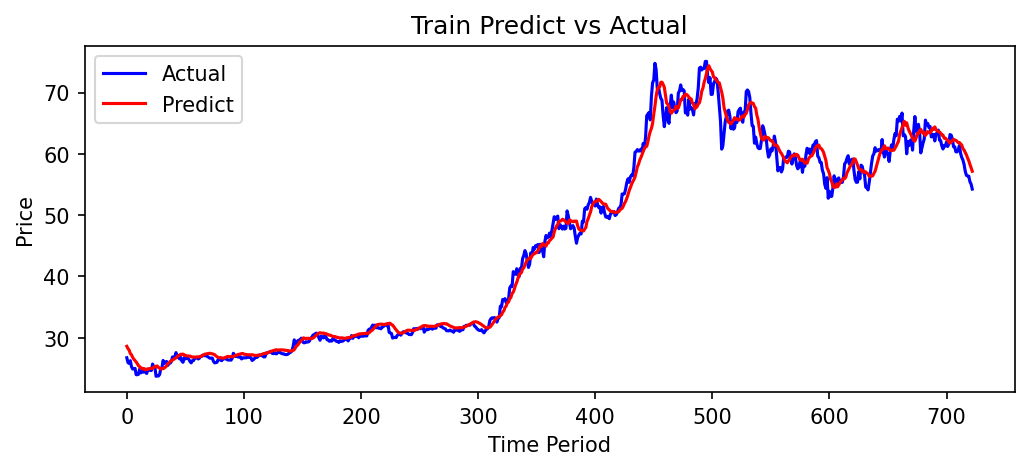

In [28]:
fig2 = plt.figure(figsize=(8, 3), dpi=150, facecolor='white')
plt.plot(y_train, color='blue', label='Actual')
plt.plot(y_train_predict, color='red', label='Predict')
plt.title('Train Predict vs Actual')  # 标题
plt.xlabel('Time Period')  # x轴标题
plt.ylabel('Price')  # y轴标题
plt.legend(loc='best')  # 添加图例到图形
plt.show()